## Text Analytics -- Case Study: The Godfather Novel

### Highly Recommended: The graphs/plots in the notebook can be viewed using this link: [nbviewer](https://nbviewer.jupyter.org), because the plotly graphs cannot be viewed in github. 

***(you will need to copy and paste the url of this notebook to the nbviewer link)***

- The aim of this text analytics project is to analyse a storybook or novel through extracting out the characters, their dialogue, words/verbs used them and also to check the locations and time occurences mentioned in the novel.

**Objectives:**

- Extract out the major characters, time occurences and geopolitical locations mentioned in the Novel.
- Extract out the interaction between the top characters if any, i.e. check if two characters appear in the same sentences
- Check the Gender distribution based on the characters in the Novel
- Extract out sentences where characters are the "Subject" and the corresponding "action verbs" used by them



### Steps Ahead:
- Convert PDF Book(.pdf) to Text Format (.txt) 
- Data Cleaning with Regex (Regular Expression)
- Entity Extraction with Spacy
- Data Visualization with Plotly:
    - Character, Geopolitical and Time occurence Visualizations
    - Gender Distribution charts
    - Character's Appearances Visualizations
- Dependency parsing -- to extract sentences where characters are the "Subject" of Sentences
- Character's action visualization


- Tools utilized: ***Spacy, NLTK, Ploty, Seaborn, Regex***
#### ***Note: All the codes are ran from the following python modules: pdf_to_txt.py, txt_extract.py, gender.py, text_plots.py, subj.py***

In [19]:
# plotly
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

#### PDF to Txt.format

In [11]:
# from pdf_to_txt import pdf_to_text

In [2]:
# pdfDir = r"C:\Users\Adeboye Adeniyi\Documents\filmscripts\pdfscripts/"
# txtDir = r'C:\Users\Adeboye Adeniyi\Documents\filmscripts\textscripts/'


In [3]:
# convert = pdf_to_text(pdfDir, txtDir)

In [4]:
# convert.convertMultiple()

In [2]:
from txt_extract import text_extract

In [3]:
txt = text_extract('./textscripts/The Godfather BOOK.pdf.txt')

In [4]:
text_data, df_chapter, df_sentences = txt.clean_text()

In [5]:
df_chapter.head(10)

,Chapters,Contents
0,Chapter 1,Behind every great fortune there is a crime ...
1,Chapter 2,Tom Hagen went to his law office in the city o...
2,Chapter 3,"Counting the driver, there were four men in th..."
3,Chapter 4,When Michael Corleone arrived at his father h...
4,Chapter 5,It was nearly four oclock in the morning as th...
5,Chapter 6,Peter Clemenza slept badly that night. In the ...
6,Chapter 7,On the night before the shooting of Don...
7,Chapter 8,The day after the shooting of Don Corle...
8,Chapter 9,When Michael Corleone went into the city that ...
9,Chapter 10,The hospital was small and private with just o...


In [6]:
person, gpe, time = txt.extract_entities(df_chapter, df_sentences)

In [7]:
characters, refined_gpes = txt.remove_similar(person,gpe)

In [8]:
print(characters)

['Michael', 'Don', 'Mario Puzo', 'Johnny', 'Sonny', 'Kay', 'Carlo', 'Jules', 'Mike', 'Corleone', 'Hagen', 'Johnny Fontane', 'Neri', 'Lucy', 'Connie', 'Nino', 'Freddie', 'Tom', 'Tom Hagen', 'Vito Corleone', 'Vito', 'Luca', 'Woltz', 'Fanucci', 'McCluskey', 'Paulie', 'Paulie Gatto', 'Tattaglia', 'Luca Brasi', 'Vito  Corleone', 'Ginny', 'Johnny  Fontane', 'Filomena', 'Johnny  ', 'Kay  ', 'Sollozzo', 'Sonny Corleone', 'Apollonia', 'Carlo Rizzi', 'Hagen  ', 'Brasi', 'Jules  ', 'Fontane', 'Gatto', 'Tom  Hagen', 'Rocco Lampone', 'Fabrizzio', 'Jack Woltz', 'Dr Taza', 'Sonny  Corleone', 'Bocchicchio', 'Nino  ', 'Enzo', 'Lampone', 'Neri  ', 'Santino', 'Carlo  Rizzi', 'Albert Neri', 'Amerigo Bonasera', 'Nino Valenti', 'Rocco', 'Valenti', 'Adams', 'Kay Adams', 'Deanna Dunn', 'Roberto', 'Mrs Corleone', 'Calo', 'Sonny  ', 'Woltz  ', 'Moe Greene', 'Baines', 'Lucy Mancini', 'Paulie  Gatto', 'Clemenza  ', 'Lucy  ', 'Greene', 'Albert  Neri', 'Connie Corleone', 'Connie  Corleone', 'Genco Abbandando', 'San

In [9]:
#Count the amount of times entities appeared in the whole Novel
#Check how many chapters and sentences entities appear in 

count_xters, xters_chpts = txt.count(df_chapter, characters)
count_gpes, gpe_chpts = txt.count(df_chapter, refined_gpes)

In [11]:
from gender import gender_distribution

In [12]:
gd = gender_distribution(characters)

In [14]:
df_gender = gd.gender_types()

In [15]:
from text_plots import plot_results

In [16]:
plt = plot_results('The Godfather')

In [17]:
plt.gender_plot(df_gender)

### - Entity Extraction and Visualization -- Person, GPE - Geopolitical locations, Time Ocuurences

In [20]:
plt.plot_entitycount(count_xters, 'Major Characters', px.colors.diverging.curl)

In [21]:
plt.plot_entitycount(count_gpes, 'Geopolitical Places', px.colors.cyclical.mygbm)

In [22]:
plt.plot_entitycount(time, 'Time occurences', px.colors.cyclical.IceFire)

In [23]:
plt.plot_ctper(xters_chpts, 'Major Character', px.colors.sequential.Viridis)

**NOTE: Mario Puzo is the author of the Godfather Novel, so it is not part of the intended character**

In [24]:
plt.plot_ctper(gpe_chpts, 'Geopolitical places', px.colors.sequential.Sunset)

### - Character Appearances across the entire Novel

In [25]:
#Check the top 3 character's interaction with each other
top1_2, top2_3, top1_3 = plt.top3xters_interaction(characters)

In [26]:
#Top Two Characters
top1_2

['Michael', 'Don']

In [27]:
#Lets if the TOP 3 Characters interact within the Novel based on their appearance in the same sentence
#Also extract the sentence in which they occur in

top1_2_sent = plt.extract_sentences_plot(df_sentences, top1_2, ['blue', 'pink'])

      Don  Michael                                           Contents
170   1.0      1.0  Michael Corleone was the youngest son of the D...
1056  1.0      1.0  When Johnny finished singing and vanished into...
1114  1.0      1.0  Don Corleone said to  his son Michael, your gi...
1145  1.0      1.0  As they walked toward the hospital entrance, D...
3626  1.0      1.0  Like the Don, Michael never told his real  bus...


In [28]:
top2_3_sent = plt.extract_sentences_plot(df_sentences, top2_3, ['green', 'purple'])

     Mario Puzo  Don                                           Contents
115         1.0  1.0  The  father of the bride, Don Vito Corleone, n...
144         1.0  1.0  And the guests so exclaimed  at  how  well  he...
348         1.0  1.0  His  name  was  Anthony  Coppola and he was th...
428         1.0  1.0  The   the Godfather By Mario Puzo   16 Don rec...
671         1.0  1.0  The cruel and contemptuous irony with which al...


In [30]:
#top1_3_sent = plt.extract_sentences_plot(df_sentences, top1_3, ['orange', 'purple'])

In [33]:
print(characters)

['Michael', 'Don', 'Mario Puzo', 'Johnny', 'Sonny', 'Kay', 'Carlo', 'Jules', 'Mike', 'Corleone', 'Hagen', 'Johnny Fontane', 'Neri', 'Lucy', 'Connie', 'Nino', 'Freddie', 'Tom', 'Tom Hagen', 'Vito Corleone', 'Vito', 'Luca', 'Woltz', 'Fanucci', 'McCluskey', 'Paulie', 'Paulie Gatto', 'Tattaglia', 'Luca Brasi', 'Vito  Corleone', 'Ginny', 'Johnny  Fontane', 'Filomena', 'Johnny  ', 'Kay  ', 'Sollozzo', 'Sonny Corleone', 'Apollonia', 'Carlo Rizzi', 'Hagen  ', 'Brasi', 'Jules  ', 'Fontane', 'Gatto', 'Tom  Hagen', 'Rocco Lampone', 'Fabrizzio', 'Jack Woltz', 'Dr Taza', 'Sonny  Corleone', 'Bocchicchio', 'Nino  ', 'Enzo', 'Lampone', 'Neri  ', 'Santino', 'Carlo  Rizzi', 'Albert Neri', 'Amerigo Bonasera', 'Nino Valenti', 'Rocco', 'Valenti', 'Adams', 'Kay Adams', 'Deanna Dunn', 'Roberto', 'Mrs Corleone', 'Calo', 'Sonny  ', 'Woltz  ', 'Moe Greene', 'Baines', 'Lucy Mancini', 'Paulie  Gatto', 'Clemenza  ', 'Lucy  ', 'Greene', 'Albert  Neri', 'Connie Corleone', 'Connie  Corleone', 'Genco Abbandando', 'San

In [31]:
#Extract Sentences where characters were mentioned in the Novel
UnamedNarrator_sent = plt.extract_sentences_plot(df_sentences, 'I', ['#A040A0'])

      I                                           Contents
10  1.0  you acted like wild beasts in a jungle and you...
14  1.0  but  because  of  your  youth,  your  clean  r...
18  1.0                          It  had all been a farce.
27  2.0  Out of control, Bonasera leaned forward toward...
36  1.0  In a garishly decorated Los Angeles hotel suit...


In [32]:
#Extract Sentences where characters were mentioned in the Novel
Micheal_sent = plt.extract_sentences_plot(df_sentences, characters[0], ['green'])

     Michael                                           Contents
168      1.0  the Godfather By Mario Puzo   8 The third son,...
170      1.0  Michael Corleone was the youngest son of the D...
175      1.0  A  worry  that  was  put  to  rest  when  Mich...
184      1.0  Michael  had  been  his  favorite  before  the...
186      1.0  But  when  World  War  Ii  broke  out,  Michae...


In [33]:
#Extract Sentences where characters were mentioned in the Novel
Don_sent = plt.extract_sentences_plot(df_sentences, characters[1], ['#B8A038'])

     Don                                           Contents
35   1.0  for justice we must go on our knees to Don Cor...
113  1.0                                     Don  Corleone.
115  1.0  The  father of the bride, Don Vito Corleone, n...
120  1.0  And so on that Saturday morning the friends of...
124  1.0  Don Vito Corleone was a man to whom everybody ...


In [38]:
#Extract Sentences where characters were mentioned in the Novel
#Mario_Puzo_sent = plt.extract_sentences_plot(df_sentences, characters[2], ['#EE99AC'])

In [34]:
#Extract Sentences where characters were mentioned in the Novel
Johnny_sent = plt.extract_sentences_plot(df_sentences, characters[3], ['#F08030'])

    Johnny                                           Contents
36     1.0  In a garishly decorated Los Angeles hotel suit...
42     1.0  He could even smile a little to himself as he ...
49     1.0                              Johnny Fontane asked.
68     1.0  Stick it in, Johnny, that  what you  really want.
69     1.0                             Johnny Fontane got up.


In [36]:
#Extract Sentences where characters were mentioned in the Novel
Sonny_sent = plt.extract_sentences_plot(df_sentences, characters[4], ['#F08030'])

     Sonny                                           Contents
146    1.0  The eldest, baptized Santino  but  called  Son...
147    1.0  Sonny  Corleone  was  tall  for  a  firstgener...
151    1.0  Here at the wedding feast, some young matrons,...
153    1.0  Sonny Corleone, despite the presence of his wi...
155    1.0  She  had  flirted  with  Sonny  in  the  past ...


### Dependency parsing in Spacy
### - Extraction of Sentences where characters are the "Subjects" and their corresponding action verbs

In [38]:
from subj import subjects

In [39]:
sub = subjects(text_data, characters)

In [40]:
#Extract sentences where characters are the "Subjects"
span_doc, df_spans = sub.subject_action()

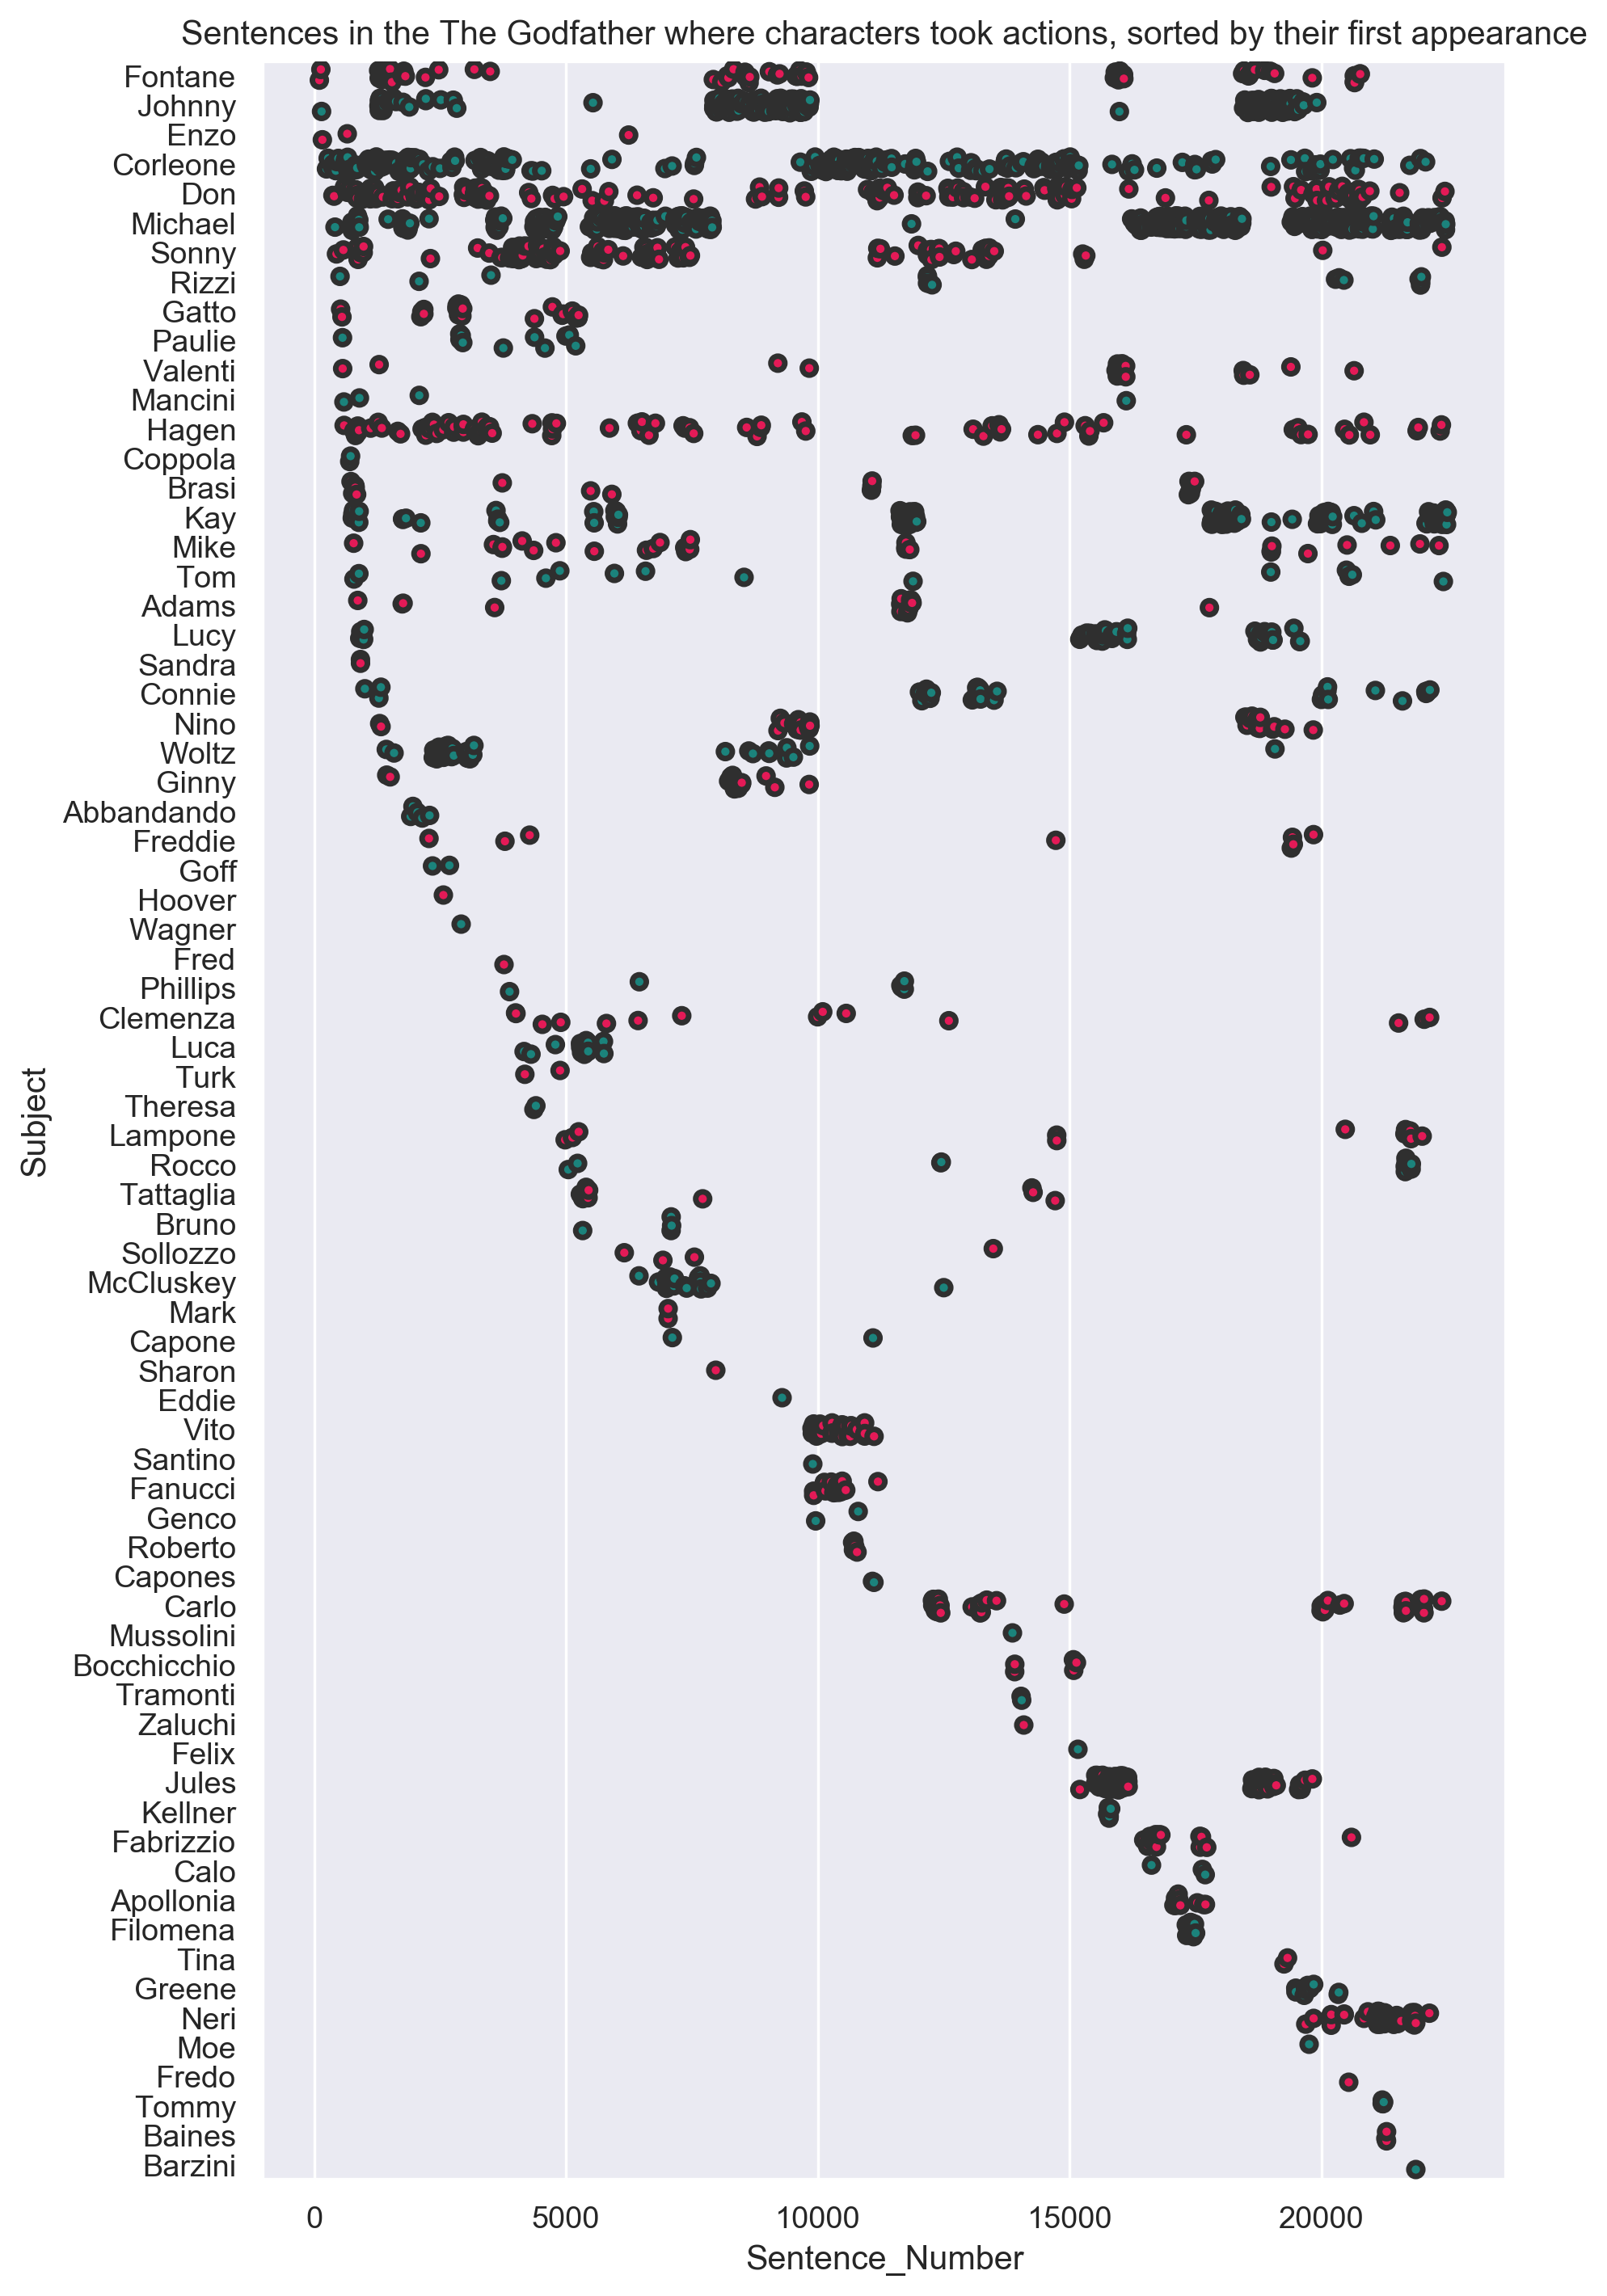

In [41]:
plt.action_plot(df_spans)

In [42]:
#Extract most common verbs and plot for all the Major characters --- Decide the Number of Top Verbs to extract/visualize
most_common_verbs = plt.most_common(df_spans, 5)

In [43]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[0], 20, px.colors.cyclical.HSV)

In [44]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[1], 20, px.colors.sequential.haline)

In [46]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[3], 20, px.colors.sequential.Blackbody)

In [47]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[4], 20, px.colors.diverging.PRGn)

### Summary:

- **NOTE: For this specific novel, Mario Puzo was the author of the Godfather, not part of the characters.**


- Spacy's NER (Named Entity Recognition) is not quite optimized for Entity extraction from Novels, as you observed there were a lot misclassification of entities that we had to use another technique to deal with, but still there were these error in classification still persisted.


- The next step will be to look at the sentences where specific characters were mentioned and perform various analyses on them such as Sentiment analysis, document similarity between different characters to compare and contrast, etc.,


- Also, these analyses could be useful for film adaptation, in the sense that it gives a screen writer a sense of the major characters (including the unamed narrator) that are needed for the movie if the novel is to be adapted.